In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import numpy as np

In [2]:
data=pd.read_csv('./properatti.csv')

In [3]:
barrios = pd.read_csv("./barrios.csv", encoding='latin1')

In [4]:
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')

In [5]:
auxData = data['description']
auxData = auxData.str.upper()
auxData = auxData.str.replace('.','', regex=True)
auxData.fillna('', inplace = True)
auxData.head()

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1    VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...
2    2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3    PH 3 AMBIENTES CON PATIO HAY 3 DEPTOS EN LOTE,...
4    DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
Name: description, dtype: object

In [6]:
auxData2 = auxData.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')
auxData2.columns=['USD', 'price']
auxData2.head

<bound method NDFrame.head of         USD  price
0       NaN    NaN
1       U$D  20000
2       NaN    NaN
3       NaN    NaN
4       NaN    NaN
...     ...    ...
121215  NaN    NaN
121216  NaN    NaN
121217  USD  20000
121218  U$S  95900
121219  NaN    NaN

[121220 rows x 2 columns]>

In [7]:
auxData2.price.notnull().sum()

13039

In [8]:
auxData2.price = pd.to_numeric(auxData2['price'])
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData2['price'])

In [9]:
auxData3 = data['title']
auxData3 = auxData3.str.upper()
auxData3 = auxData3.str.replace('.', '', regex=True)
auxData3.fillna('', inplace=True)

In [10]:
auxData4 = auxData3.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')
auxData4.columns = ['USD', 'price']
auxData4.price.notnull().sum()
auxData4.price = pd.to_numeric(auxData4['price'])
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData4['price'])

In [11]:
capital_federal_completo = data.loc[data.state_name.str.contains('Capital Federal') == True]
capital_federal = capital_federal_completo.loc[(capital_federal_completo.lat > -35) & (capital_federal_completo.lon > -60), :]


In [12]:
geometria = gpd.points_from_xy(capital_federal['lon'], capital_federal['lat'])

In [13]:
capital_federal_geo=gpd.GeoDataFrame(capital_federal, geometry=geometria)

capital_federal_geo.crs = {'init' :'epsg:4326'}

c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


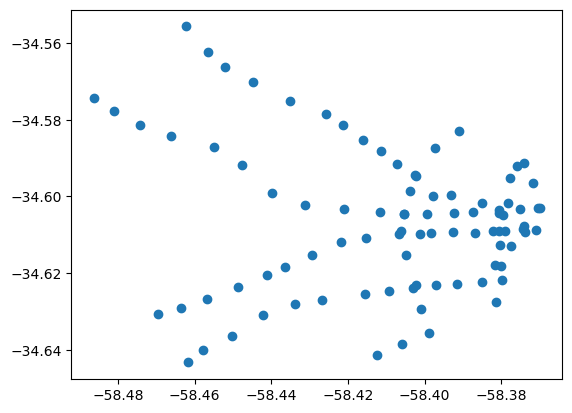

In [14]:
data_location = "./estaciones-de-subte.csv"

df_subte = pd.read_csv(data_location, sep=',')

geometria = gpd.points_from_xy(df_subte.long, df_subte.lat)

geo_subte = gpd.GeoDataFrame(df_subte ,geometry=geometria)

geo_subte.plot()

In [15]:
def calculate_distance_min(p,geo_subte):
    distances = geo_subte.distance(p.geometry)
    return distances.min()


In [16]:
capital_federal_geo['distancia_subte']= capital_federal_geo.apply(lambda x: calculate_distance_min(x, geo_subte), axis=1)

In [17]:
capital_federal_geo

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,geometry,distancia_subte
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,POINT (-58.50884 -34.66182),0.050048
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,POINT (-58.52298 -34.65226),0.057533
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,POINT (-58.51642 -34.64780),0.049808
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,POINT (-58.44336 -34.55987),0.010223
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,POINT (-58.44336 -34.55987),0.010223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121153,121153,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5992135511,-58.4025191971",-34.599214,...,2538.461538,NaN,NaN,NaN,http://www.properati.com.ar/1cj5g_venta_depart...,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...,EXCELENTE DEPARTAMENTO DE 3 AMBIENTES CON TERR...,https://thumbs4.properati.com/0/xIo-Keo_1sE6zO...,POINT (-58.40252 -34.59921),0.001422
121158,121158,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.587425443,-58.3973722534",-34.587425,...,4230.769231,NaN,NaN,NaN,http://www.properati.com.ar/1cj5s_venta_depart...,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,https://thumbs4.properati.com/1/O847ZBAPkkdt0a...,POINT (-58.39737 -34.58743),0.000161
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,POINT (-58.44268 -34.56369),0.006631
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,POINT (-58.44268 -34.56369),0.006631


In [18]:
data_CABA_deptos=capital_federal_geo.loc[(capital_federal_geo.state_name=="Capital Federal")&(capital_federal_geo.property_type=="apartment")]
data_CABA_deptos.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'geometry', 'distancia_subte'],
      dtype='object')

In [19]:
data_CABA_deptos.shape[0]

19445

In [20]:
data_CABA_deptos=data_CABA_deptos.drop(['Unnamed: 0', 'operation', 
       'place_with_parent_names', 'country_name',  'geonames_id',
       'lat-lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url',  'image_thumbnail'
       ],axis=1)

In [21]:
data_CABA_deptos.columns

Index(['property_type', 'place_name', 'state_name', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'description', 'title', 'geometry',
       'distancia_subte'],
      dtype='object')

In [22]:
data_CABA_deptos.isnull().sum()

property_type               0
place_name                  0
state_name                  0
lat                         0
lon                         0
price_aprox_usd          1001
surface_total_in_m2      3938
surface_covered_in_m2    1262
price_usd_per_m2         5024
description                 0
title                       0
geometry                    0
distancia_subte             0
dtype: int64

In [23]:
data_CABA_deptos_limpio=data_CABA_deptos.drop(data_CABA_deptos.loc[data_CABA_deptos.price_aprox_usd.isnull()].index)

In [24]:
data_CABA_deptos_limpio.isnull().sum()

property_type               0
place_name                  0
state_name                  0
lat                         0
lon                         0
price_aprox_usd             0
surface_total_in_m2      3799
surface_covered_in_m2     847
price_usd_per_m2         4023
description                 0
title                       0
geometry                    0
distancia_subte             0
dtype: int64

In [25]:
data_CABA_deptos_limpio.shape[0]

18444

In [26]:
superficie_max=400
deptos_grandes=data_CABA_deptos_limpio[data_CABA_deptos_limpio.surface_total_in_m2>superficie_max]
deptos_grandes.shape[0]

84

In [27]:
superficie_max=400
deptos_normales=data_CABA_deptos_limpio[data_CABA_deptos_limpio.surface_total_in_m2<=superficie_max]
deptos_normales.shape[0]

14561

In [28]:
superficie_min=15
deptos_mini=data_CABA_deptos_limpio[data_CABA_deptos_limpio.surface_total_in_m2<superficie_min]  
deptos_mini.shape[0]  

17

In [29]:
data_CABA_deptos_limpios_sin_outliers=data_CABA_deptos_limpio[(data_CABA_deptos_limpio.surface_total_in_m2>=superficie_min)&(data_CABA_deptos_limpio.surface_total_in_m2<=superficie_max)]

In [30]:
data_CABA_deptos_limpios_sin_outliers.shape[0]

14544

In [31]:
data_CABA_deptos_limpios_sin_outliers.isnull().sum()

property_type              0
place_name                 0
state_name                 0
lat                        0
lon                        0
price_aprox_usd            0
surface_total_in_m2        0
surface_covered_in_m2    506
price_usd_per_m2         218
description                0
title                      0
geometry                   0
distancia_subte            0
dtype: int64

In [32]:
data_CABA_deptos_limpios_sin_outliers["diferencia_sup"]=data_CABA_deptos_limpios_sin_outliers["surface_total_in_m2"]-data_CABA_deptos_limpios_sin_outliers["surface_covered_in_m2"]

c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [33]:
sup_mal=data_CABA_deptos_limpios_sin_outliers[data_CABA_deptos_limpios_sin_outliers.diferencia_sup<0]
print(sup_mal.shape[0])
sup_mal_indices=sup_mal.index.to_list

41


In [34]:
data_CABA_deptos_limpios_sin_outliers=data_CABA_deptos_limpios_sin_outliers[data_CABA_deptos_limpios_sin_outliers.diferencia_sup>=0]

In [35]:
data_CABA_deptos_limpios_sin_outliers.shape[0]

13997

In [36]:
data_CABA_deptos_limpios_sin_outliers.isnull().sum()

property_type              0
place_name                 0
state_name                 0
lat                        0
lon                        0
price_aprox_usd            0
surface_total_in_m2        0
surface_covered_in_m2      0
price_usd_per_m2         204
description                0
title                      0
geometry                   0
distancia_subte            0
diferencia_sup             0
dtype: int64

In [37]:
data_CABA_deptos_limpios_sin_outliers["precio_m2_usd_por_m2_total"]=data_CABA_deptos_limpios_sin_outliers["price_aprox_usd"]/data_CABA_deptos_limpios_sin_outliers["surface_total_in_m2"]

In [38]:
data_CABA_deptos_limpios_sin_outliers["diferencia_precio_m2"]=data_CABA_deptos_limpios_sin_outliers["precio_m2_usd_por_m2_total"]-data_CABA_deptos_limpios_sin_outliers["price_usd_per_m2"]

In [39]:
data_CABA_deptos_limpios_sin_outliers["diferencia_precio_m2"].value_counts

<bound method IndexOpsMixin.value_counts of 2         0.000000e+00
7         4.547474e-13
8         0.000000e+00
19        4.547474e-13
21       -4.547474e-13
              ...     
121121    4.547474e-13
121131    4.547474e-13
121153    4.547474e-13
121158    0.000000e+00
121217    0.000000e+00
Name: diferencia_precio_m2, Length: 13997, dtype: float64>

[(0.0, 10000.0)]

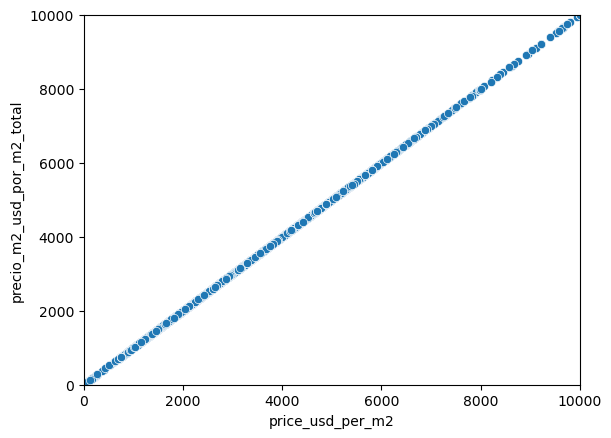

In [40]:
g=sns.scatterplot(data=data_CABA_deptos_limpios_sin_outliers, x='price_usd_per_m2', y='precio_m2_usd_por_m2_total')
g.set(xlim=(0,10000))
g.set(ylim=(0,10000))

In [41]:
data_CABA_deptos_limpios_sin_outliers=data_CABA_deptos_limpios_sin_outliers.drop("price_usd_per_m2",axis=1)

In [42]:
data_CABA_deptos_limpios_sin_outliers=data_CABA_deptos_limpios_sin_outliers.drop("diferencia_precio_m2",axis=1)

Conservar diferencia de superficie

In [43]:
data_CABA_deptos_limpios_sin_outliers.isnull().sum()

property_type                 0
place_name                    0
state_name                    0
lat                           0
lon                           0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
description                   0
title                         0
geometry                      0
distancia_subte               0
diferencia_sup                0
precio_m2_usd_por_m2_total    0
dtype: int64

In [44]:
import re
import numpy as np
pattern_pozo="pozo|proyecto|constructor"
pattern_pozo_regex=re.compile(pattern_pozo, flags = re.IGNORECASE)
pattern_pozo_match=data_CABA_deptos_limpios_sin_outliers["description"].apply(lambda x: x if x is np.NaN else pattern_pozo_regex.search(x))
print(pattern_pozo_match.isnull().sum(),pattern_pozo_match.notnull().sum())

12634 1363


In [45]:
data_CABA_deptos_limpios_sin_outliers.loc[pattern_pozo_match.notnull(), "Pozo"] = pattern_pozo_match[pattern_pozo_match.notnull()].apply(lambda x: x.group(0))


In [46]:
data_CABA_deptos_limpios_sin_outliers["Pozo"].value_counts()

proyecto       394
pozo           289
Pozo           195
POZO           132
Proyecto       114
PROYECTO        83
CONSTRUCTOR     72
constructor     67
Constructor     17
Name: Pozo, dtype: int64

In [47]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo=data_CABA_deptos_limpios_sin_outliers[data_CABA_deptos_limpios_sin_outliers["Pozo"].isnull()]

In [48]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.shape[0]

12634

In [49]:
pattern_pozo_match2=data_CABA_deptos_limpios_sin_outliers_sin_pozo["description"].apply(lambda x: x if x is np.NaN else pattern_pozo_regex.search(x))
print(pattern_pozo_match2.isnull().sum(),pattern_pozo_match2.notnull().sum())

12634 0


In [50]:
pattern_amenities="amenities"
pattern_amenities_regex=re.compile(pattern_amenities, flags = re.IGNORECASE)
pattern_amenities_match=data_CABA_deptos_limpios_sin_outliers_sin_pozo["description"].apply(lambda x: x if x is np.NaN else pattern_amenities_regex.search(x))
print(pattern_amenities_match.isnull().sum(),pattern_amenities_match.notnull().sum())

10485 2149


In [51]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.loc[pattern_amenities_match.notnull(), "Amenities"] = pattern_amenities_match[pattern_amenities_match.notnull()].apply(lambda x: x.group(0))


c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [52]:
pattern_categoria="categoría|categoria|lujo|exclusivo"
pattern_categoria_regex=re.compile(pattern_categoria, flags = re.IGNORECASE)
pattern_categoria_match=data_CABA_deptos_limpios_sin_outliers_sin_pozo["description"].apply(lambda x: x if x is np.NaN else pattern_categoria_regex.search(x))
print(pattern_categoria_match.isnull().sum(),pattern_categoria_match.notnull().sum())

10725 1909


In [53]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.loc[pattern_categoria_match.notnull(), "Categoria"] = pattern_categoria_match[pattern_categoria_match.notnull()].apply(lambda x: x.group(0))
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria=data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria.str.lower()

In [54]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria.value_counts()

categoría    1077
categoria     440
exclusivo     274
lujo          118
Name: Categoria, dtype: int64

In [55]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo["Categoria"].replace("categoría","categoria",inplace=True)
data_CABA_deptos_limpios_sin_outliers_sin_pozo["Categoria"].replace("exclusivo","categoria",inplace=True)
data_CABA_deptos_limpios_sin_outliers_sin_pozo["Categoria"].replace("lujo","categoria",inplace=True)


c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [56]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria.value_counts()

categoria    1909
Name: Categoria, dtype: int64

In [57]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Amenities.value_counts()

amenities    846
Amenities    756
AMENITIES    547
Name: Amenities, dtype: int64

In [58]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo["Amenities"].replace("AMENITIES","amenities",inplace=True)
data_CABA_deptos_limpios_sin_outliers_sin_pozo["Amenities"].replace("Amenities","amenities",inplace=True)
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Amenities.fillna("sin amenities",inplace=True)


c:\Users\anacl\.conda\envs\dhdsblend2021_clase10\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [59]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Amenities.value_counts()

sin amenities    10485
amenities         2149
Name: Amenities, dtype: int64

In [60]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria.fillna("estandar",inplace=True)

In [61]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo.Categoria.value_counts()

estandar     10725
categoria     1909
Name: Categoria, dtype: int64

In [62]:
dummies_ambas = pd.get_dummies(data=data_CABA_deptos_limpios_sin_outliers_sin_pozo,columns=["Categoria","Amenities"])


In [63]:
data_CABA_deptos_limpios_sin_outliers_sin_pozo

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,description,title,geometry,distancia_subte,diferencia_sup,precio_m2_usd_por_m2_total,Pozo,Amenities,Categoria
2,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,72000.0,55.0,55.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,POINT (-58.52298 -34.65226),0.057533,0.0,1309.090909,NaN,sin amenities,estandar
7,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,POINT (-58.44336 -34.55987),0.010223,5.0,3066.666667,NaN,sin amenities,estandar
8,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",POINT (-58.44336 -34.55987),0.010223,5.0,3000.000000,NaN,sin amenities,estandar
19,apartment,Palermo,Capital Federal,-34.580504,-58.405874,350000.0,104.0,96.0,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",POINT (-58.40587 -34.58050),0.009443,8.0,3365.384615,NaN,sin amenities,estandar
21,apartment,Palermo,Capital Federal,-34.590926,-58.411665,270500.0,118.0,73.0,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,POINT (-58.41167 -34.59093),0.002714,45.0,2292.372881,NaN,sin amenities,estandar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121121,apartment,Barrio Norte,Capital Federal,-34.597132,-58.398943,59000.0,29.0,24.0,Monoambiente con renta hasta febrero 2018 $ 50...,Departamento - Barrio Norte,POINT (-58.39894 -34.59713),0.002816,5.0,2034.482759,NaN,sin amenities,estandar
121131,apartment,Recoleta,Capital Federal,-34.590628,-58.397539,325000.0,113.0,113.0,Excelente semipiso al frente de 4 ambientes. E...,"Venta departamento Recoleta, departamento 3 am...",POINT (-58.39754 -34.59063),0.003183,0.0,2876.106195,NaN,sin amenities,estandar
121153,apartment,Barrio Norte,Capital Federal,-34.599214,-58.402519,165000.0,91.0,65.0,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...,EXCELENTE DEPARTAMENTO DE 3 AMBIENTES CON TERR...,POINT (-58.40252 -34.59921),0.001422,26.0,1813.186813,NaN,sin amenities,estandar
121158,apartment,Recoleta,Capital Federal,-34.587425,-58.397372,165000.0,44.0,39.0,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,POINT (-58.39737 -34.58743),0.000161,5.0,3750.000000,NaN,sin amenities,estandar


In [64]:
dummies_ambas

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,description,title,geometry,distancia_subte,diferencia_sup,precio_m2_usd_por_m2_total,Pozo,Categoria_categoria,Categoria_estandar,Amenities_amenities,Amenities_sin amenities
2,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,72000.0,55.0,55.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,POINT (-58.52298 -34.65226),0.057533,0.0,1309.090909,NaN,0,1,0,1
7,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,POINT (-58.44336 -34.55987),0.010223,5.0,3066.666667,NaN,0,1,0,1
8,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",POINT (-58.44336 -34.55987),0.010223,5.0,3000.000000,NaN,0,1,0,1
19,apartment,Palermo,Capital Federal,-34.580504,-58.405874,350000.0,104.0,96.0,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",POINT (-58.40587 -34.58050),0.009443,8.0,3365.384615,NaN,0,1,0,1
21,apartment,Palermo,Capital Federal,-34.590926,-58.411665,270500.0,118.0,73.0,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,POINT (-58.41167 -34.59093),0.002714,45.0,2292.372881,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121121,apartment,Barrio Norte,Capital Federal,-34.597132,-58.398943,59000.0,29.0,24.0,Monoambiente con renta hasta febrero 2018 $ 50...,Departamento - Barrio Norte,POINT (-58.39894 -34.59713),0.002816,5.0,2034.482759,NaN,0,1,0,1
121131,apartment,Recoleta,Capital Federal,-34.590628,-58.397539,325000.0,113.0,113.0,Excelente semipiso al frente de 4 ambientes. E...,"Venta departamento Recoleta, departamento 3 am...",POINT (-58.39754 -34.59063),0.003183,0.0,2876.106195,NaN,0,1,0,1
121153,apartment,Barrio Norte,Capital Federal,-34.599214,-58.402519,165000.0,91.0,65.0,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...,EXCELENTE DEPARTAMENTO DE 3 AMBIENTES CON TERR...,POINT (-58.40252 -34.59921),0.001422,26.0,1813.186813,NaN,0,1,0,1
121158,apartment,Recoleta,Capital Federal,-34.587425,-58.397372,165000.0,44.0,39.0,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,POINT (-58.39737 -34.58743),0.000161,5.0,3750.000000,NaN,0,1,0,1


In [65]:
dummies_ambas.drop(["Amenities_sin amenities","Categoria_estandar"],axis=1)

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,description,title,geometry,distancia_subte,diferencia_sup,precio_m2_usd_por_m2_total,Pozo,Categoria_categoria,Amenities_amenities
2,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,72000.0,55.0,55.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,POINT (-58.52298 -34.65226),0.057533,0.0,1309.090909,NaN,0,0
7,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,POINT (-58.44336 -34.55987),0.010223,5.0,3066.666667,NaN,0,0
8,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",POINT (-58.44336 -34.55987),0.010223,5.0,3000.000000,NaN,0,0
19,apartment,Palermo,Capital Federal,-34.580504,-58.405874,350000.0,104.0,96.0,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",POINT (-58.40587 -34.58050),0.009443,8.0,3365.384615,NaN,0,0
21,apartment,Palermo,Capital Federal,-34.590926,-58.411665,270500.0,118.0,73.0,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,POINT (-58.41167 -34.59093),0.002714,45.0,2292.372881,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121121,apartment,Barrio Norte,Capital Federal,-34.597132,-58.398943,59000.0,29.0,24.0,Monoambiente con renta hasta febrero 2018 $ 50...,Departamento - Barrio Norte,POINT (-58.39894 -34.59713),0.002816,5.0,2034.482759,NaN,0,0
121131,apartment,Recoleta,Capital Federal,-34.590628,-58.397539,325000.0,113.0,113.0,Excelente semipiso al frente de 4 ambientes. E...,"Venta departamento Recoleta, departamento 3 am...",POINT (-58.39754 -34.59063),0.003183,0.0,2876.106195,NaN,0,0
121153,apartment,Barrio Norte,Capital Federal,-34.599214,-58.402519,165000.0,91.0,65.0,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...,EXCELENTE DEPARTAMENTO DE 3 AMBIENTES CON TERR...,POINT (-58.40252 -34.59921),0.001422,26.0,1813.186813,NaN,0,0
121158,apartment,Recoleta,Capital Federal,-34.587425,-58.397372,165000.0,44.0,39.0,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,POINT (-58.39737 -34.58743),0.000161,5.0,3750.000000,NaN,0,0


In [66]:
dummies_ambas.columns

Index(['property_type', 'place_name', 'state_name', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'description', 'title', 'geometry', 'distancia_subte', 'diferencia_sup',
       'precio_m2_usd_por_m2_total', 'Pozo', 'Categoria_categoria',
       'Categoria_estandar', 'Amenities_amenities', 'Amenities_sin amenities'],
      dtype='object')

In [67]:
data_final=dummies_ambas.drop([ 'Amenities_sin amenities','Categoria_estandar','property_type','state_name','description', 'title', 'geometry', 'Pozo'],axis=1)

In [68]:
data_final.columns

Index(['place_name', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'distancia_subte', 'diferencia_sup',
       'precio_m2_usd_por_m2_total', 'Categoria_categoria',
       'Amenities_amenities'],
      dtype='object')

In [69]:
data_final.shape[0]

12634

In [70]:
data_final.isnull().sum()

place_name                    0
lat                           0
lon                           0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
distancia_subte               0
diferencia_sup                0
precio_m2_usd_por_m2_total    0
Categoria_categoria           0
Amenities_amenities           0
dtype: int64

In [71]:
data_final.place_name.value_counts()

Palermo          1179
Caballito        1153
Belgrano         1125
Recoleta          867
Barrio Norte      662
                 ... 
Pompeya             7
Palermo Viejo       5
Villa Real          4
Villa Soldati       3
Catalinas           2
Name: place_name, Length: 61, dtype: int64

In [72]:
data_final.place_name.value_counts()["Palermo Soho"]

88

In [73]:
data_final.place_name.value_counts()["Palermo Hollywood"]

159

In [74]:
data_final.place_name.value_counts()["Palermo Chico"]

128

In [75]:
data_final_Belgrano=data_final.loc[data_final.place_name=="Belgrano"]


In [76]:
data_final_Belgrano.shape[0]

1125

In [251]:
data_final_baratos=data_final.loc[data_final.precio_m2_usd_por_m2_total<=10000]

In [252]:
data_final_baratos.shape[0]

12603

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV


<hr>

In [94]:
X = data_final_Belgrano[['lat', 'lon', 'surface_covered_in_m2', 'distancia_subte', 'Categoria_categoria',
       'Amenities_amenities']]
y = data_final_Belgrano["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [95]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)


[175.34015165 228.08975722 123.0639973  118.7118546   64.1118971
 252.72134755]
3027.204246815434


In [96]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 15.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)


15.0
[168.55065873 220.71804223 121.61549494 114.67641786  64.48944162
 248.71146645]
3027.2042468154395


In [98]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 0.6, 0.7, 0.8, 0.9,1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)


0.3
[174.67289777 227.46692551 122.86652556 118.24465491  63.93457613
 252.49813104]
3027.2042468154345


In [99]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')


Modelo OLS:

Score (R^2) en train del modelo es 0.20824822520613417 y en test es 0.0793071134167801


Modelo Ridge:

Score (R^2) en train del modelo es 0.20814125414407947 y en test es 0.08318610922121816


Modelo Lasso:

Score (R^2) en train del modelo es 0.208247251338064 y en test es 0.0796139053418996




In [102]:
X = data_final_Belgrano[['distancia_subte', 'Categoria_categoria',
       'Amenities_amenities',"diferencia_sup"]]
y = data_final_Belgrano["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [104]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)


[  95.76217053  109.53971365  195.41849056 -157.36605551]
3016.1870266418973


In [105]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 15.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)


15.0
[  94.023637    108.04772316  192.40741367 -154.53561559]
3016.1870266418973


In [106]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 0.6, 0.7, 0.8, 0.9,1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)


1.5
[  94.23701093  108.18329291  194.25900573 -155.7371896 ]
3016.1870266418973


In [107]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')


Modelo OLS:

Score (R^2) en train del modelo es 0.13335100305446856 y en test es 0.13582332412062004


Modelo Ridge:

Score (R^2) en train del modelo es 0.13331631519687648 y en test es 0.1355902004337527


Modelo Lasso:

Score (R^2) en train del modelo es 0.13333864319650168 y en test es 0.1358142665013723




<hr>

In [206]:
X = data_final_Belgrano[['distancia_subte']]
y = data_final_Belgrano["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [216]:
X = data_final_Belgrano[["Amenities_amenities"]]
y = data_final_Belgrano["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [237]:
X = data_final_Belgrano[["lat","lon"]]
y = data_final_Belgrano["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [238]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)


[160.86404005 235.71450454]
3016.034358214436


In [239]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 15.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)


15.0
[154.66472048 228.62986326]
3016.034358214435


In [240]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 0.6, 0.7, 0.8, 0.9,1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)


0.8
[159.30109513 234.15399941]
3016.034358214436


In [241]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')


Modelo OLS:

Score (R^2) en train del modelo es 0.06651856948835022 y en test es 0.07800568774181771


Modelo Ridge:

Score (R^2) en train del modelo es 0.06645004331167359 y en test es 0.07778462326933888


Modelo Lasso:

Score (R^2) en train del modelo es 0.06651482905892714 y en test es 0.07797139169554013




ATENTI: Si vamos a usar todo Cap. Fed. ver outliers de precios en Balvanera y Villa Urquiza.

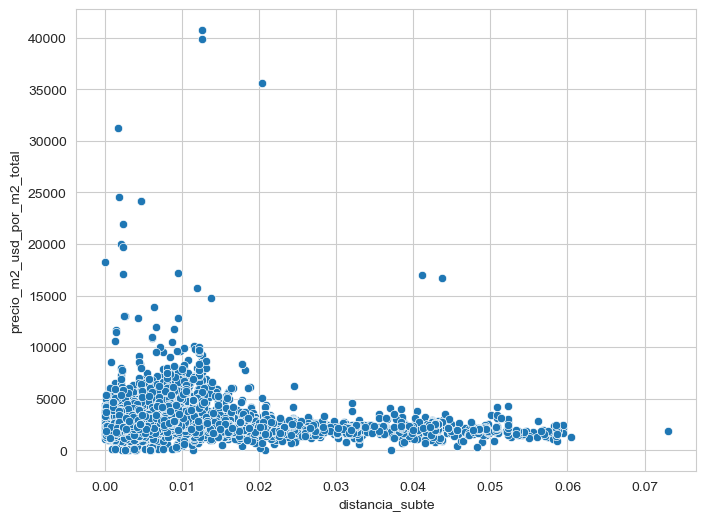

In [248]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_final, x="distancia_subte", y="precio_m2_usd_por_m2_total")
#plt.xlabel("diametro tronco")
#plt.ylabel("altura")
#plt.title("Scatter Plot")


In [249]:
data_final.precio_m2_usd_por_m2_total.describe()

count    12634.000000
mean      2706.149915
std       1357.838528
min          0.006369
25%       2060.606061
50%       2473.553644
75%       3000.000000
max      40720.405797
Name: precio_m2_usd_por_m2_total, dtype: float64

In [250]:
data_final.groupby("place_name").precio_m2_usd_por_m2_total.describe()

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Abasto,32.0,2054.306944,444.385751,1000.000000,1812.500000,2152.950311,2325.748848,2857.142857
Agronomía,19.0,2280.424765,247.516737,1842.105263,2093.732143,2317.073171,2471.875000,2638.297872
Almagro,615.0,2233.427477,518.423486,70.512821,1950.490196,2187.058824,2467.193245,5000.000000
Balvanera,341.0,1970.781390,967.332133,828.571429,1631.578947,1859.154930,2171.875000,13066.666667
Barracas,214.0,2032.910485,559.795227,0.008130,1707.571138,1908.263305,2385.640049,4027.777778
...,...,...,...,...,...,...,...,...
Villa Real,4.0,1675.060562,391.031171,1100.000000,1626.744186,1812.621124,1860.937500,1975.000000
Villa Santa Rita,13.0,2062.126033,305.899151,1333.333333,1973.684211,2161.764706,2270.270270,2352.941176
Villa Soldati,3.0,1096.060606,540.347366,784.090909,784.090909,784.090909,1252.045455,1720.000000


In [258]:
X = data_final_baratos[['lat', 'lon', 'surface_covered_in_m2', 'distancia_subte', 'Categoria_categoria',
       'Amenities_amenities']]
y = data_final_baratos["precio_m2_usd_por_m2_total"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [259]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)


[368.63963964 350.11213254 147.68937072 171.42970877 137.61292819
 185.18636202]
2664.112578291331


In [260]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 15.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)


15.0
[367.64033969 348.81330781 147.78807586 170.37746814 137.54881528
 184.92728153]
2664.112578291331


In [261]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')


Modelo OLS:

Score (R^2) en train del modelo es 0.26864957505816844 y en test es 0.2611697614713091


Modelo Ridge:

Score (R^2) en train del modelo es 0.26864805256594704 y en test es 0.261161498405615


Modelo Lasso:



ValueError: X has 6 features, but LassoCV is expecting 2 features as input.

In [ ]:
#auxData5 = data_CABA_deptos_limpio['description']
#auxData5 = auxData5.str.upper()
#auxData5 = auxData5.str.replace('.','', regex=True)
#auxData5.fillna('', inplace = True)
#auxData5.head()

In [ ]:
#auxData6 = auxData5.str.extract('(\d+)\s?(M2|m2|)')
#auxData6.columns=['M2', 'sup']
#auxData6.head

In [ ]:
#auxData6.sup = pd.to_numeric(auxData6['sup'])


In [ ]:
#data_CABA_deptos_limpio['surface_total_in_m2'] = data_CABA_deptos_limpio['surface_total_in_m2'].fillna(auxData6['sup'])

In [ ]:
#data_CABA_deptos_limpio.isnull().sum()